# Naive Bayes

Naive Bayes is a powerful machine-learning algorithmn which is used for machine-learning and probabilistic modelling. It utilises the Baye's Theorem and is most useful for textual analysis, for any categorical identification, may it be in the areas of education, security, health and social sector.  

Naive Bayes is built on the Bayes' theorem, which is a conditional probability model. Wherein, it allows the user to calculate the probabilities of a particular class or a category given a set of features or independant variables. As the features are assumed to be independant, the probability is calculated on basis of that assumption.

Naive Bayes' primary goal is to classify data into specified classes or categories based on observed attributes. This is accomplished by taking into account both the prior probability of each class (as informed by historical data or domain knowledge) and the likelihood of witnessing the provided traits under each class. This data is used to compute the conditional probability of each class and determine which class is more likely given the given data.

There are various types of Naive Bayes: 

1. The Gaussian Naive Bayes algorithm is appropriate for continuous or real-valued data, such as medical measures. 
2. Multinomial Naive Bayes excels at text classification, which makes it useful for tasks such as spam detection and sentiment analysis when features represent word counts or phrase frequencies. 
3. Bernoulli Naive Bayes is an excellent choice for working with binary data, and it is frequently
   
Due to Naive Bayes' computational efficiency and the ability to carry it on with simplicity, the approach is appealing to many machine learning practitioners. You can acquire accurate and relevant classification results by picking the proper Naive Bayes variant and applying it to your specific dataset. Naive Bayes is especially well-suited for scenarios requiring speed, simplicity, and a probabilistic approach. Because of its probabilistic character and foundation in Bayes' theorem, it can make educated decisions and is a vital addition to the machine learning toolset.

In [1]:
import  pandas  as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [2]:
def accuracy(y,ypred):
    #compute accuracy
    print("Accuracy:", accuracy_score(y, ypred)*100)
    
def precision(y,ypred):
    #compute precision
    print("Precision Score:", precision_score(y, ypred, average="micro")*100)
    
def recall(y,ypred):
    #compute recall
    print("Recall Score:", recall_score(y, ypred, average="micro")*100)


def f1(y,ypred):
    #compute f1
    print("F1 Score:", f1_score(y, ypred, average="micro")*100)

## Naive Bayes for Quantitative data

As my data consists of data for 5 BRICS nations separately and also contains a dataframe which is a culmination of my existing datasets. As discussed in the cleaning section, the stacked_df has self generated labels section that I had created to ensure it is usable for Naive Bayes. Whilst it is not actually recommended to create self-generated labels for the datasets, especially for the economic data as it works on the progression of time and things are extremely volatile. However, for utilising Naive Bayes I had created it. So my utilisation of Naive Bayes taking the entire dataset into consideration is so I used the Gaussian Naive Bayes data as it is useful for the real-life data. 

In [3]:
india=pd.read_csv('../data/csv_files_numerical_countries/india.csv')
russia=pd.read_csv('../data/csv_files_numerical_countries/russia.csv')
china=pd.read_csv('../data/csv_files_numerical_countries/china.csv')
brazil=pd.read_csv('../data/csv_files_numerical_countries/brazil.csv')
southafrica=pd.read_csv('../data/csv_files_numerical_countries/southafrica.csv')
stacked_df = pd.concat([india, russia, china, brazil, southafrica])

In [4]:
stacked_df.isna().sum()
stacked_df = stacked_df.dropna()

In [5]:

numerical_columns = stacked_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(stacked_df[numerical_columns]), columns=numerical_columns)
stacked_df[df_standardized.columns] = df_standardized
print(stacked_df.head(5))

       year  adj_NNI_g  adj_NNI_c  adj_savings_fix_cap_GNI  \
0 -1.836926   1.211664  -0.705121                 0.393875   
1 -1.756840  -1.129654  -0.717481                 0.442708   
2 -1.676754  -0.454036  -0.709869                 0.504223   
3 -1.596668   1.144657  -0.654868                 0.446455   
4 -1.516582  -0.417719  -0.645040                 0.499170   

   adj_savings_edu_GNI  adj_NNS_GNI  curr_acc_bal  ex_imp_gdp  ex_imp_growth  \
0            -1.010335    -0.408151     -1.134653   -0.391100       0.098823   
1            -1.010335    -0.274835     -1.169065   -0.413871      -0.657708   
2            -0.955520    -0.320892     -1.158242   -0.408582       0.196687   
3            -0.943078    -0.323459     -1.129084   -0.424880      -0.669952   
4            -0.998182    -0.313247     -1.145000   -0.375005       0.356302   

   ex_debt_shocks  ...       cpi  inflation  real_interest_rate  \
0       -2.331331  ... -0.398574  -0.668898           -1.288718   
1       -2.2

In [6]:
stacked_df = stacked_df.dropna()
stacked_df.isna().sum()

year                             0
adj_NNI_g                        0
adj_NNI_c                        0
adj_savings_fix_cap_GNI          0
adj_savings_edu_GNI              0
adj_NNS_GNI                      0
curr_acc_bal                     0
ex_imp_gdp                       0
ex_imp_growth                    0
ex_debt_shocks                   0
final_consump_exp_gdp            0
final_consump_exp_growth         0
fdi_net_inflows                  0
fdi_net_outflows                 0
gdp_growth                       0
gdp_per_capita_growth            0
gener_govt_fin_consump_exp       0
gni_growth                       0
goods_exp_bop                    0
goods_imp_bop                    0
imports_goods_services_gdp       0
imports_goods_services_growth    0
services_gdp                     0
services_growth                  0
short_term_debt_tot_reserves     0
trade_gdp                        0
cpi                              0
inflation                        0
real_interest_rate  

In [7]:
stacked_df.drop(columns='year')

,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,final_consump_exp_gdp,...,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1,labels
0,1.211664,-0.705121,0.393875,-1.010335,-0.408151,-1.134653,-0.391100,0.098823,-2.331331,1.629755,...,-0.398574,-0.668898,-1.288718,-0.687387,0.466640,0.569132,-1.936929,0.360350,-1.836926,High Growth
1,-1.129654,-0.717481,0.442708,-1.010335,-0.274835,-1.169065,-0.413871,-0.657708,-2.243219,1.580500,...,-0.371809,-0.642555,-1.260266,-0.687387,0.480544,0.527471,-1.921123,0.409013,-1.756840,High Growth
2,-0.454036,-0.709869,0.504223,-0.955520,-0.320892,-1.158242,-0.408582,0.196687,-1.929006,1.567708,...,-0.353591,-0.720427,-1.142488,-0.687387,0.494275,0.601982,-1.840814,0.556365,-1.676754,Moderate Growth
3,1.144657,-0.654868,0.446455,-0.943078,-0.323459,-1.129084,-0.424880,-0.669952,-1.821442,1.576719,...,-0.324027,-0.661114,-1.162604,-0.687387,0.507809,0.617031,-1.738525,0.535915,-1.596668,Very High Growth
4,-0.417719,-0.645040,0.499170,-0.998182,-0.313247,-1.145000,-0.375005,0.356302,-1.578976,1.557486,...,-0.300846,-0.714042,-1.134845,-0.687387,0.520998,0.752971,-1.654926,0.622921,-1.516582,Moderate Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,-0.079197,-0.393533,-0.173223,2.646487,-0.809397,0.709016,-2.224949,-0.581400,-0.018377,-0.876474,...,-0.568803,-0.324423,0.608011,-0.791993,-0.491076,0.959402,0.915725,1.200695,-0.395379,Low Growth
46,-1.755485,-0.444716,-1.680063,2.520925,-0.809397,0.533660,-2.358258,-0.552348,1.082878,-0.808123,...,-0.677560,1.016738,0.985550,-0.738046,-0.172467,1.579092,0.933567,-0.011703,-0.315293,Low Growth
47,2.593355,-0.292355,2.254327,1.198101,-0.809244,1.259113,-0.108950,0.902195,3.118460,-0.543260,...,-0.555552,1.052491,1.589457,-0.524708,1.258840,-3.343034,0.877097,0.304242,-0.235207,Low Growth
48,2.910178,-0.091072,2.559309,0.705554,-0.809092,1.867200,1.203704,1.627926,3.261046,-0.591679,...,-0.453991,0.004715,1.531847,-0.428589,-0.342242,-2.153784,0.850222,0.521039,-0.155121,Very High Growth


We drop the year column since we have stacked the dataframe on top of each year. When we analyse the data, usually, especially countries like the BRICS, we either analyse on basis of a single year or do it for a single country according to time. When you want the time parameter to be part of the dataset, the problem that can be seen is that you can't analyse all the countries together. But if you want to do it separately for all the datasets, the sample size is often doing to be smaller and be biased for that specific country's performance. Hence, for us, the year column is dropped.

### Train-Test Split

In [8]:
Y = stacked_df['labels']
X =  stacked_df.drop(['labels'],axis =1)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
x_train_valid, x_valid_test, y_train_valid, y_valid_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))
print('Valid Train data    :'+str(x_train_valid.shape))
print('Valid Test data     :'+str(x_valid_test.shape))
print('Valid Train Output  :'+str(y_train_valid.shape))
print('Valid Test Output   :'+str(y_valid_test.shape))

Train data    :(88, 35)
Test data     :(23, 35)
Train Output  :(88,)
Test Output   :(23,)
Valid Train data    :(11, 35)
Valid Test data     :(12, 35)
Valid Train Output  :(11,)
Valid Test Output   :(12,)


### Feature-Selection Method

The feature-selection method plays an important role in understanding which features to select as most of the times high multicollinearity can affect the dataset. According to this, the features mentioned below, the top 10 and the bottom 10 are the features that are highly correlated with each other and can be removed.

In [10]:
corr=stacked_df.corr
corr

<bound method DataFrame.corr of         year  adj_NNI_g  adj_NNI_c  adj_savings_fix_cap_GNI  \
0  -1.836926   1.211664  -0.705121                 0.393875   
1  -1.756840  -1.129654  -0.717481                 0.442708   
2  -1.676754  -0.454036  -0.709869                 0.504223   
3  -1.596668   1.144657  -0.654868                 0.446455   
4  -1.516582  -0.417719  -0.645040                 0.499170   
..       ...        ...        ...                      ...   
45 -0.395379  -0.079197  -0.393533                -0.173223   
46 -0.315293  -1.755485  -0.444716                -1.680063   
47 -0.235207   2.593355  -0.292355                 2.254327   
48 -0.155121   2.910178  -0.091072                 2.559309   
49 -0.075035  -0.293256  -0.062337                -0.327189   

    adj_savings_edu_GNI  adj_NNS_GNI  curr_acc_bal  ex_imp_gdp  ex_imp_growth  \
0             -1.010335    -0.408151     -1.134653   -0.391100       0.098823   
1             -1.010335    -0.274835     -1.16906

In [11]:
# using pearson
corr = stacked_df.corr(numeric_only=True)
corr_matrix = corr.stack()
positive_corr = corr_matrix[corr_matrix > 0]
positive_top = positive_corr.sort_values(ascending=True)
positive_top = positive_top.head(10)
print(positive_top)

fdi_net_inflows               year.1                          0.004242
year.1                        fdi_net_inflows                 0.004242
fdi_net_inflows               year                            0.004242
year                          fdi_net_inflows                 0.004242
life_exp_birth                goods_exp_bop                   0.005946
goods_exp_bop                 life_exp_birth                  0.005946
short_term_debt_tot_reserves  adj_NNI_g                       0.005991
adj_NNI_g                     short_term_debt_tot_reserves    0.005991
life_exp_birth                goods_imp_bop                   0.007963
goods_imp_bop                 life_exp_birth                  0.007963
dtype: float64


In [12]:
corr = stacked_df.corr(numeric_only=True)
corr_matrix = corr.stack()
negative_corr = corr_matrix[corr_matrix < 0]
negative_bottom = negative_corr.sort_values(ascending=True)
negative_bottom = negative_bottom.head(10)
print(negative_bottom)

final_consump_exp_gdp          fdi_net_inflows                 -0.955139
fdi_net_inflows                final_consump_exp_gdp           -0.955139
adj_savings_edu_GNI            gener_govt_fin_consump_exp      -0.949196
gener_govt_fin_consump_exp     adj_savings_edu_GNI             -0.949196
final_consump_exp_gdp          imports_goods_services_growth   -0.938298
imports_goods_services_growth  final_consump_exp_gdp           -0.938298
final_consump_exp_gdp          services_gdp                    -0.934168
services_gdp                   final_consump_exp_gdp           -0.934168
services_growth                final_consump_exp_gdp           -0.921622
final_consump_exp_gdp          services_growth                 -0.921622
dtype: float64


In [13]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [14]:
pred_valid = naive_bayes.predict(x_train_valid)

In [15]:
# Predicting the train data and test data
pred_train = naive_bayes.predict(X_train)
pred_test = naive_bayes.predict(X_test)

In [16]:
# Training data

accuracy(y_train, pred_train)
precision(y_train, pred_train)
recall(y_train, pred_train)
f1(y_train, pred_train)
    

Accuracy: 21.59090909090909
Precision Score: 21.59090909090909
Recall Score: 21.59090909090909
F1 Score: 21.59090909090909


We see that the accuracy, precision, recall and f1 score are all 60%

In [17]:
# Testing Data

accuracy(y_test, pred_test)
precision(y_test, pred_test)
recall(y_test, pred_test)
f1(y_test, pred_test)

Accuracy: 17.391304347826086
Precision Score: 17.391304347826086
Recall Score: 17.391304347826086
F1 Score: 17.391304347826086


We see that the accuracy, precision, recall and f1 score are all 54%. This means the testing data performs lesser than training, it means the model may be underfitted. And the Validation dataset performs a bit lesser which means there is high bias and low variance.

In [18]:
# Validation 
accuracy(y_train_valid, pred_valid)
precision(y_train_valid, pred_valid)
recall(y_train_valid, pred_valid)
f1(y_train_valid, pred_valid)

Accuracy: 9.090909090909092
Precision Score: 9.090909090909092
Recall Score: 9.090909090909092
F1 Score: 9.090909090909092


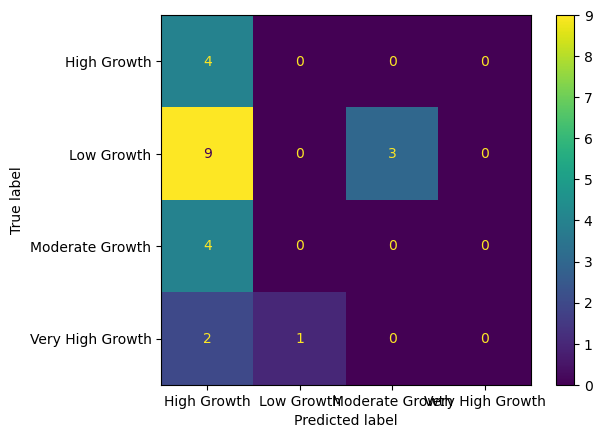

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)

According to the confusion matrix, we see that the High Growth not been predicted properly, followed by Moderate Growth. This is also a problem that comes when we self-emerge the dataset.

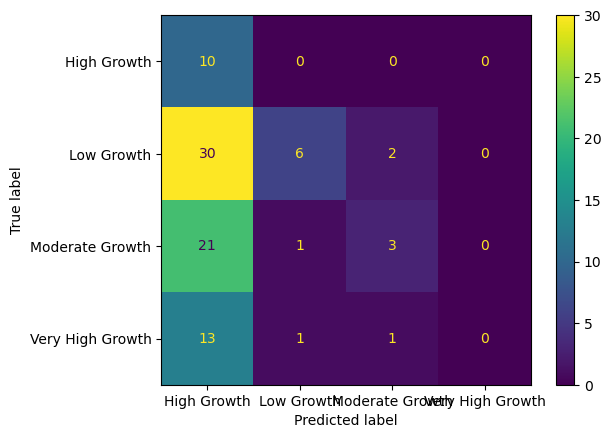

In [20]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train)

In the training data, Moderate Growth have been misslabelled and even the Very high Growth categories.

## Naive Bayes for Textual Data data

Understanding the textual data is also just as important since the textual data gives us a lot of information about whatever is happening in terms of the public opinion which is extremely important from the point of view of the data. Understanding and carefully making sure to categorise this is important as well. For this data, we have used the textual data that has been retrieved from the Reddit PRAW wrapper and has been labelled using the Sentiment Intensity Analyser. 

In [21]:
finaldf=pd.read_csv('../data/csv_files_textual/sentiment.csv')

In [22]:
finaldf.head(10)

,Unnamed: 0,cleaned_tweets,label
0,0,burn flag,0
1,1,plan kill petro dollar run manipulated western...,-1
2,2,difficult know whats going come summit next we...,-1
3,3,lot unpack brics would bring table officially ...,1
4,4,nice feel way thats brics supped make feel lik...,1
5,5,seems like well ahead schedule already 50 perc...,1
6,6,yeah precisely fully explained today family me...,1
7,7,watched lecture school predicted global south ...,1
8,8,think hope happens sooner rather later live eu...,1
9,9,supposed happen week hold boys,0


In [23]:

finaldf = finaldf.loc[:, ['cleaned_tweets', 'label']] 
finaldf.head(10)

,cleaned_tweets,label
0,burn flag,0
1,plan kill petro dollar run manipulated western...,-1
2,difficult know whats going come summit next we...,-1
3,lot unpack brics would bring table officially ...,1
4,nice feel way thats brics supped make feel lik...,1
5,seems like well ahead schedule already 50 perc...,1
6,yeah precisely fully explained today family me...,1
7,watched lecture school predicted global south ...,1
8,think hope happens sooner rather later live eu...,1
9,supposed happen week hold boys,0


In [24]:

# Assuming you have a DataFrame with 'text' and 'label' columns
X = finaldf['cleaned_tweets']  # Text data
Y = finaldf['label']  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
x_train_valid, x_valid_test, y_train_valid, y_valid_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))
print('Valid Train data    :'+str(x_train_valid.shape))
print('Valid Test data     :'+str(x_valid_test.shape))
print('Valid Train Output  :'+str(y_train_valid.shape))
print('Valid Test Output   :'+str(y_valid_test.shape))

Train data    :(96,)
Test data     :(24,)
Train Output  :(96,)
Test Output   :(24,)
Valid Train data    :(12,)
Valid Test data     :(12,)
Valid Train Output  :(12,)
Valid Test Output   :(12,)


I divided the data into training, testing and validation. Training accounts for 80% of the data, testing accounts for 20% of the data and validation accounts for 50% of the data.

#### Feature extraction using TF-IDF

Term Frequency-Inverse Document Frequency, or TF-IDF, is a critical text analysis technique used to determine the significance of words in texts. It allocates numerical values to words based on their frequency in a document and rarity in a set of documents. TF-IDF aids in ranking and finding relevant texts, extracting key information, and reducing the dimensionality of text data by assigning higher scores to terms that are both frequent in the document and unique to it. Since my data contains information which can have strong sentiments associated to it, I utilised it.

In [25]:

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
x_train_valid_tfidf= tfidf_vectorizer.transform(x_train_valid)

In [26]:

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# training data
y_pred_train = mnb.predict(X_train_tfidf)

# testing data
y_pred_test = mnb.predict(X_test_tfidf)

#validation
y_pred_val = mnb.predict(x_train_valid_tfidf)

I utilised Multinomial Naive Bayes as it helps in textual classification concerning sentiment analysis. The values for accuracy, precision, recall and F1 have been calculated. It is seen that Training and Testing perform equally well, meaning there is no overfitting or underfitting seen.

In [27]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average="micro")
recall_train = recall_score(y_train, y_pred_train, average="micro")
f1_train = f1_score(y_train, y_pred_train, average="micro")

print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision Score:", precision_train)
print("Recall Score:", recall_train)
print("F1 Score:", f1_train)

Training Set Metrics:
Accuracy: 0.6354166666666666
Precision Score: 0.6354166666666666
Recall Score: 0.6354166666666666
F1 Score: 0.6354166666666666


In [28]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average="micro")
recall_test = recall_score(y_test, y_pred_test, average="micro")
f1_test = f1_score(y_test, y_pred_test, average="micro")

print("Testing Set Metrics:")
print("Accuracy:", accuracy_train*100)
print("Precision Score:", precision_train*100)
print("Recall Score:", recall_train*100)
print("F1 Score:", f1_train*100)

Testing Set Metrics:
Accuracy: 63.541666666666664
Precision Score: 63.541666666666664
Recall Score: 63.541666666666664
F1 Score: 63.541666666666664


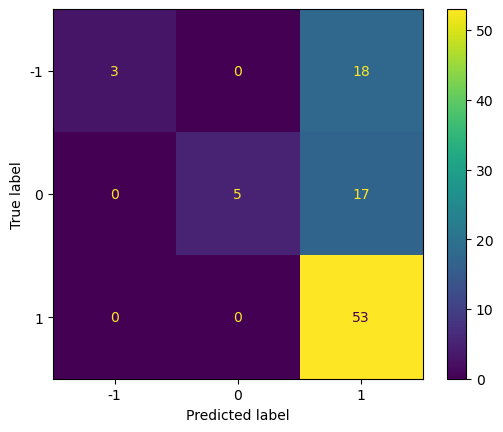

In [29]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)


For training dataset, if you see, the values have been labelled correctly but the 17 labels with 0 indicating no opinion has been predicted as 1 which means a positive sentiment. And similarly the negative sentiment has been predicting as positive sentiment.

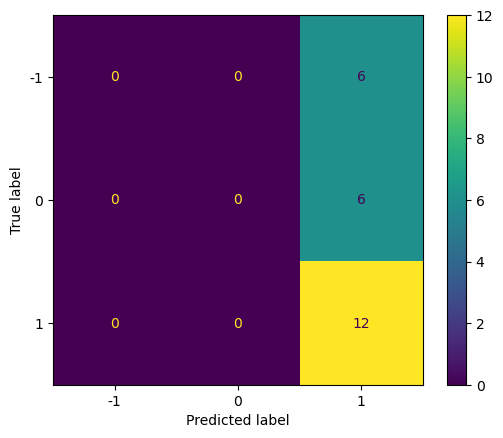

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

For testing dataset, if you see, the values have been labelled correctly but the 6 labels with 0 indicating no opinion has been predicted as 1 which means a positive sentiment. 6 of neutral sentiments with 0 have also been predicted as 1. 

Both textual and quantitative naive have shown its efficiency in predicting categorical class, however, this also provides a que into further development and analysis of this project to work on this more and utilise better feature selection and feature engineering methods to increase the overall metrics.